# Entanglement Transition in a spin-1/2 tetramer

Here we generate neutron scattering functions for the model in Refs. [[1](#Irons2016),[2](#Irons2017)] using CorrelationConnection. We will compute neutron scattering functions for a spin-1/2 tetramer under different magnetic fields and see evidence of an entanglement transition. We note that [a different code](https://github.com/quintquant/magneto) was used to generate the date in Refs. [[1](#Irons2016),[2](#Irons2017)] so this also serves as a check that the codes in CorrelationConnection work as expected. 

First, load a bunnch of well-known libraries:

In [1]:
import pickle
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy 
import scipy.sparse.linalg as sprsla
from math import sqrt, pi

Now set the path to and load CorrelationConnection-specific modules:

In [2]:
sys.path.append("../bin/") # <-- We assume we are in the docs subdirectory
sys.path.append(".")

In [3]:
import hamiltonians
import randomizer
import stability_analysis_class
import tools
import exact_diagonalisation_code_sparse

We now create our model. This is exactly the same as the model described in Refs. [[1](Irons2016),[2](Irons2017)]. However, it is important to note some differences in the ways constants are defined. In [the magneto code](https://www.github.com/quintquant/magneto) used for that earlier work the Hamiltonian is, in dimensionless units,

$$H=\frac{1}{2}\sum_{j=1}^L \left[ (1+\gamma)S_j^xS_{j+1}^x   (1-\gamma)S_j^yS_{j+1}^y - \Delta S_j^zS_{j+1}^z \right] -h\sum_{j+1}^L S_j^z $$

[CorrelationConnection](https://github.com/TymoteuszTula/CorrelationConnection) can deal with more general Hamiltonians of the form 

$$H=\sum_{\alpha,\beta=x,y,z}\sum_{i,j=1}^{L} J_{i,j}^{\alpha,\beta}S_i^{\alpha}S_j^{\beta}-\sum_{j=1}^L\mathbf{h}\cdot \mathbf{S}_j$$

This allows for a more general class of cluster magnets, including magetic molecules with interactions going beyond nearest neighbours and in teractions that break all the symmetries of the molecule, e.g. chiral interactions or even interactions that do not respect $C_L$ rotations (e.g. if the interaction strength between n.n. sites is different in different places on the molecule). Note however that the spatial arrangement of magnetic sites within the cluster is fixed for a given $L$ and the same in both codes. The orientaition of the local (site-specific) magnetic axes with respect to which the spin components in the above expressions are written is also the same.

The less general model can be obtained by setting all interaction terms to zero except 

$$ J_{j,j+1}^x = \frac{1}{2} \left( 1+\gamma \right) ;
J_{j,j+1}^y = \frac{1}{2} \left( 1-\gamma \right) ; and
J_{j,j+1}^z = \frac{1}{2} \Delta $$

and by setting the field to

$$\mathbf{h} = \left( 0, 0, h\right).$$

Below we reproduce the plots in Fig. 6.8 of Ref. [1](Irons2016) (p. 132) which show how the diffuse, magnetic, static neutron scattering function $\mathcal{S}(\mathbf{q})$ of a tetramer ($L=4$) as a function of the applied field and shows clear evidence of an entanglement transition.

First let us generate a single neutron scattering image corresponding to zero field:

In [4]:
# SET THE REFERENCE MODEL:

L=4                                          # <-- Number of spins
h = [[0, 0, 0]]                              # <-- Applied field
J_onsite = np.zeros((3, 3))                  # <-- Onsite interactions (superfluous for S=1/2)
J_nnn = np.zeros((3, 3))                     # <-- nnn interactions
J_nn = [[0.7, 0, 0], [0, 0.3, 0], [0, 0, 0]] # <-- nn interactions
temp = 0.1                                   # <-- Temperature

# CREATE THE REFERENCE MODEL: 

HAMILTONIAN = hamiltonians.NNHamiltonian(L, h, J_onsite, J_nn, J_nnn, temp)

In [5]:
# SET RANDOMIZER PARAMETERS:

delta= 0.1          # <-- Variation of random samples away from reference state/Hamiltonian
no_of_processes= 1  # <-- Number of processes to use (paralleization)

# CREATE RANDOMIZER:

RANDOMIZER = randomizer.RandomizerStateRandomDelta(HAMILTONIAN, delta, no_of_processes)

In [6]:
# SET PARAMETERS FOR FITNESS LANDSCAPE:

corr = ["Sxx", "Sxy", "Sxz", "Syx", "Syy", "Syz", "Szx", "Szy", "Szz"] # <-- Correlators that need to be calculated
temp= HAMILTONIAN.temp  # <-- Obtain temperature from the Hamiltonian setup
save_rhams= "False"     # <-- Do not save random Hamiltonians/states
temp_type= "value"      # <-- Temperature given explicitly

# CREATE FINTESS LANDSCAPE ANALYSIS:

STABILITY_ANALYSIS = stability_analysis_class.StabilityAnalysisSparse(HAMILTONIAN, RANDOMIZER, corr, save_rhams,temp_mul=temp, temp_type=temp_type)

# SET PARAMETERS FOR CALCULATION: 

no_of_samples= 1

# CALCULATE:

dist, en, diffSij, diffSq, Sqs, Sijs, Sqints, Sq_int=STABILITY_ANALYSIS.generate_random_Sij_sparse(no_of_samples)

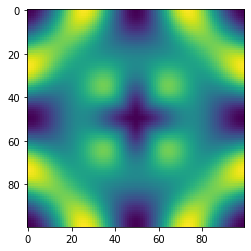

In [7]:
plt.imshow(STABILITY_ANALYSIS.Sq_int_in)
plt.show()

Now let us use a loop to generate images for all the values of the field in the figure we are trying to reproduce: 

h= [[0, 0, 0.0]] 



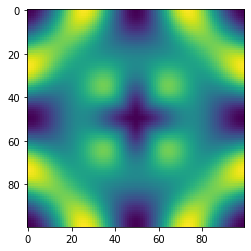

h= [[0, 0, 0.25]] 



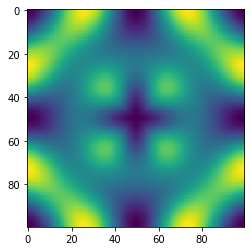

h= [[0, 0, 0.5]] 



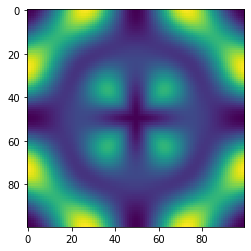

h= [[0, 0, 0.7]] 



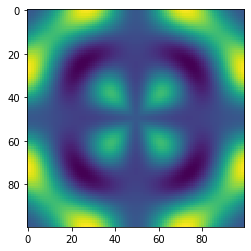

h= [[0, 0, 0.95]] 



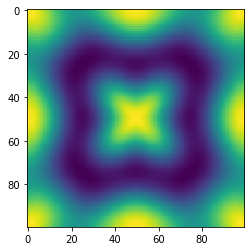

h= [[0, 0, 1.0]] 



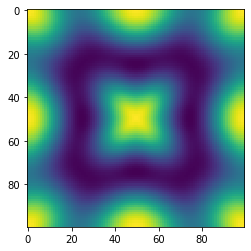

h= [[0, 0, 1.25]] 



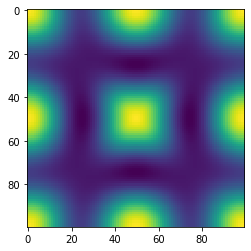

h= [[0, 0, 1.5]] 



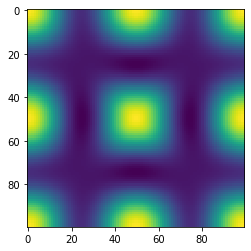

In [8]:
for hvalue in [0.00,0.25,0.50,0.70,0.95,1.00,1.25,1.50]:
    h=[[0,0,hvalue]]
    print ("h=",h,"\n")
    HAMILTONIAN =        \
        hamiltonians.    \
        NNHamiltonian(L, h, J_onsite, J_nn, J_nnn, temp)
    RANDOMIZER = \
        randomizer.\
        RandomizerStateRandomDelta(
            HAMILTONIAN, delta, no_of_processes
        )
    STABILITY_ANALYSIS = \
        stability_analysis_class.\
        StabilityAnalysisSparse(
            HAMILTONIAN, RANDOMIZER, corr, save_rhams,\
            temp_mul=temp, temp_type=temp_type
        )
    dist, en, diffSij, diffSq, Sqs, Sijs, Sqints, Sq_int=\
        STABILITY_ANALYSIS.\
        generate_random_Sij_sparse(no_of_samples)
    plt.imshow(STABILITY_ANALYSIS.Sq_int_in)
    plt.show()

If we look at all the images we can see the qualitative change in the pattern reflecting the entanglement transition. Since these images have been obtained at finite temperature the transition is actually a crossover. However at zero temperature the change is much more sudden. This is shown in Fig. 6.6 on p. 129 of Ref. [1](Irons2016) which we reproduce here for completeness: 

h= [[0, 0, 0.0]] 



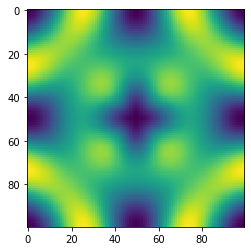

h= [[0, 0, 0.25]] 



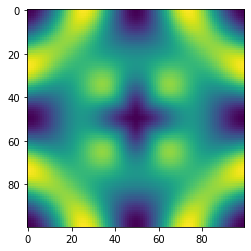

h= [[0, 0, 0.5]] 



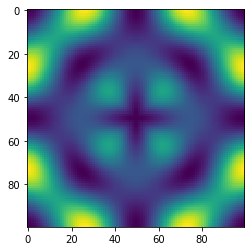

h= [[0, 0, 0.9]] 



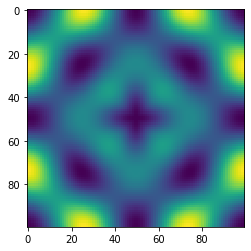

h= [[0, 0, 0.92]] 



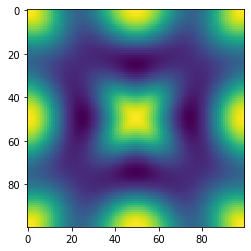

h= [[0, 0, 1.0]] 



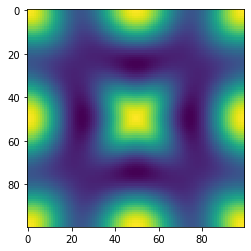

h= [[0, 0, 1.25]] 



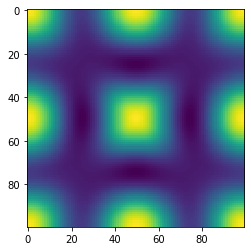

h= [[0, 0, 1.5]] 



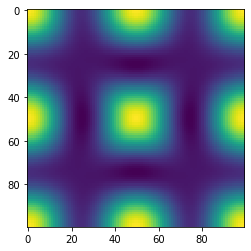

In [9]:
temp=0.0
for hvalue in [0.00,0.25,0.50,0.90,0.92,1.00,1.25,1.50]:
    h=[[0,0,hvalue]]
    print ("h=",h,"\n")
    HAMILTONIAN =        \
        hamiltonians.    \
        NNHamiltonian(L, h, J_onsite, J_nn, J_nnn, temp)
    RANDOMIZER = \
        randomizer.\
        RandomizerStateRandomDelta(
            HAMILTONIAN, delta, no_of_processes
        )
    STABILITY_ANALYSIS = \
        stability_analysis_class.\
        StabilityAnalysisSparse(
            HAMILTONIAN, RANDOMIZER, corr, save_rhams,\
            temp_mul=temp, temp_type=temp_type
        )
    dist, en, diffSij, diffSq, Sqs, Sijs, Sqints, Sq_int=\
        STABILITY_ANALYSIS.\
        generate_random_Sij_sparse(no_of_samples)
    plt.imshow(STABILITY_ANALYSIS.Sq_int_in)
    plt.show()

# References

<a id=Irons2016>[1]</a> Hannah Irons, "Experimental Implications of the Entanglement Transition in Clustered Quantum Materials" (PhD thesis, University of Kent, 2016). [https://kar.kent.ac.uk/56641/](https://kar.kent.ac.uk/56641/)

<a id=Irons2017>[2]</a>  Irons, Hannah R., Quintanilla, Jorge, Perring, Toby G., Amico, Luigi, Aeppli, Gabriel (2017) Control of entanglement transitions in quantum spin clusters. Physical Review B: Condensed Matter and Materials Physics, 96 (22). p. 224408. ISSN 0163-1829. [(doi:10.1103/PhysRevB.96.224408)](https://dx.doi.org/10.1103/PhysRevB.96.224408) [https://kar.kent.ac.uk/61595/](https://kar.kent.ac.uk/61595/)